In [6]:
import numpy as np
from scipy import linalg as la
import pandas as pd
from matplotlib import pyplot as plt

from datetime import datetime

from collections import Counter

In [5]:
daily_returns = pd.read_csv('rets.csv')
daily_returns = daily_returns.fillna(0)
daily_returns = daily_returns.transpose()

dates = daily_returns.iloc[0].values
modified_dates = [datetime.strptime(dates[i],'%m/%d/%Y').strftime('%b-%d-%Y') for i in range(len(dates))]

daily_returns.columns = modified_dates

daily_returns = daily_returns.drop(['TICKER'])

stock_info = pd.read_csv('stock_info.csv')
stock_info = stock_info.set_index('TICKER')
stock_info = stock_info.drop(columns=['Company'])

joined = daily_returns.join(stock_info, how='outer')
joined = joined.dropna()
joined["Industry_Code"] = joined["Industry_Code"].astype(str)

data = joined.to_numpy();
X_daily_ret = data[:, :-1]
y_daily_ret = data[:, -1]
print(sum(y_daily_ret == '525990.0'))

160


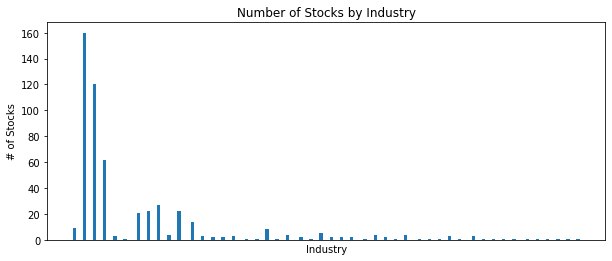

Most Common Industry Code: ['525990.0']
Num occurences: 160 out of 536


In [9]:
def my_mode(sample):
    c = Counter(sample)
    return [k for k, v in c.items() if v == c.most_common(1)[0][1]]

plt.rcParams["figure.figsize"] = (10,4)

plt.hist(y_daily_ret, bins=150)
plt.title("Number of Stocks by Industry")
plt.xticks([])
plt.xlabel("Industry")
plt.ylabel("# of Stocks")
plt.show()
print("Most Common Industry Code: " + str(my_mode(y_daily_ret)))
print("Num occurences: " + str(sum(y_daily_ret == my_mode(y_daily_ret))) + " out of " + str(len(y_daily_ret)))

AttributeError: type object 'Image' has no attribute 'open'

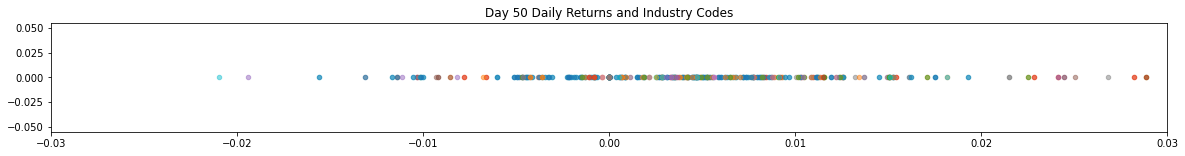

In [7]:
#Plot Day 50 distributions

plt.rcParams["figure.figsize"] = (20,2)

for code in np.unique(y_daily_ret):
    temp_X = X_daily_ret[y_daily_ret == code]
    plt.scatter(temp_X[:,50], np.zeros(len(temp_X[:,50])), s=20, alpha=0.5)

plt.xlim((-0.03, 0.03))
plt.title("Day 50 Daily Returns and Industry Codes")
plt.savefig('testplot.png')
Image.open('testplot.png').save('testplot.jpg','JPEG')
plt.show()

In [5]:
weekly_returns = pd.read_csv('weekly_rets.csv')
weekly_returns = weekly_returns.fillna(0)
weekly_returns = weekly_returns.transpose()

dates = weekly_returns.iloc[0].values
modified_dates = [datetime.strptime(dates[i],'%m/%d/%Y').strftime('%b-%d-%Y') for i in range(len(dates))]

weekly_returns.columns = modified_dates

weekly_returns = weekly_returns.drop(['TICKER'])

stock_info = pd.read_csv('stock_info.csv')
stock_info = stock_info.set_index('TICKER')
stock_info = stock_info.drop(columns=['Company'])

joined = weekly_returns.join(stock_info, how='outer')
joined = joined.dropna()
joined["Industry_Code"] = joined["Industry_Code"].astype(str)

data = joined.to_numpy();
X_weekly_ret = data[:, :-1]
y_weekly_ret = data[:, -1]

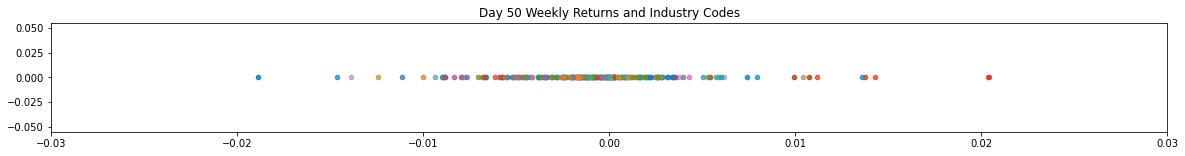

In [6]:
#Plot Day 50 distributions

plt.rcParams["figure.figsize"] = (20,2)

for code in np.unique(y_weekly_ret):
    temp_X = X_weekly_ret[y_daily_ret == code]
    plt.scatter(temp_X[:,50], np.zeros(len(temp_X[:,50])), s=20, alpha=0.5)

plt.xlim((-0.03, 0.03))
plt.title("Day 50 Weekly Returns and Industry Codes")
plt.show()

In [7]:
monthly_returns = pd.read_csv('monthly_rets.csv')
monthly_returns = monthly_returns.fillna(0)
monthly_returns = monthly_returns.transpose()

dates = monthly_returns.iloc[0].values
modified_dates = [datetime.strptime(dates[i],'%m/%d/%Y').strftime('%b-%d-%Y') for i in range(len(dates))]

monthly_returns.columns = modified_dates

monthly_returns = monthly_returns.drop(['TICKER'])

stock_info = pd.read_csv('stock_info.csv')
stock_info = stock_info.set_index('TICKER')
stock_info = stock_info.drop(columns=['Company'])

joined = monthly_returns.join(stock_info, how='outer')
joined = joined.dropna()
joined["Industry_Code"] = joined["Industry_Code"].astype(str)

data = joined.to_numpy();
X_monthly_ret = data[:, :-1]
y_monthly_ret = data[:, -1]

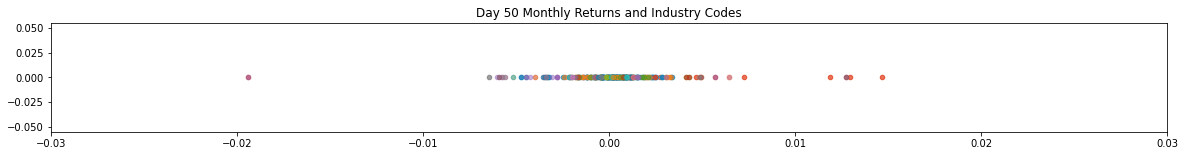

In [8]:
#Plot Day 50 distributions

plt.rcParams["figure.figsize"] = (20,2)

for code in np.unique(y_monthly_ret):
    temp_X = X_monthly_ret[y_monthly_ret == code]
    plt.scatter(temp_X[:,50], np.zeros(len(temp_X[:,50])), s=20, alpha=0.5)

plt.xlim((-0.03, 0.03))
plt.title("Day 50 Monthly Returns and Industry Codes")
plt.show()

We can see that the monthly returns are clustered closer together, while the weekly and monthly returns have much higher variance.